Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [62]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [63]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/MyDrive/Melanoma/'

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [64]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/MyDrive/Melanoma/Train")
data_dir_test = pathlib.Path('gdrive/MyDrive/Melanoma/Test')

In [65]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [66]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [67]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


In [68]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [69]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

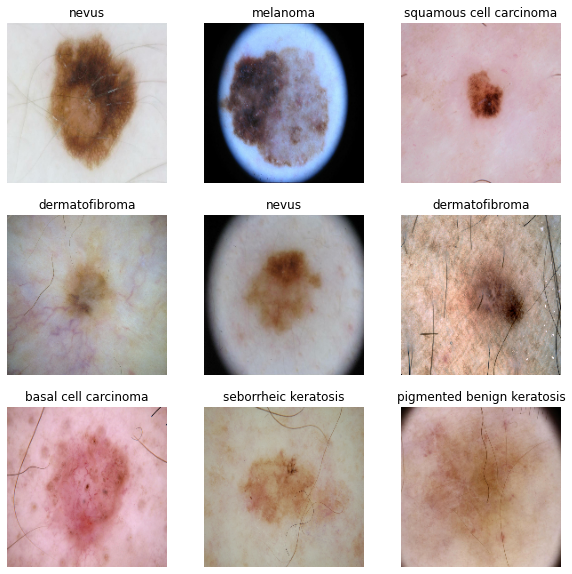

In [70]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [71]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [72]:
### Your code goes here
# Creating model with 3 convolution and 3 max pooling layers with the output layer with 9 classes - i.e. 9 types of skin cancers
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [73]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

In [74]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
394/394 [==============================] - 76s 40ms/step - loss: 1.5297 - accuracy: 0.4162 - val_loss: 2.1290 - val_accuracy: 0.2174
Epoch 2/20
394/394 [==============================] - 14s 36ms/step - loss: 1.1122 - accuracy: 0.5896 - val_loss: 2.6136 - val_accuracy: 0.3478
Epoch 3/20
394/394 [==============================] - 14s 36ms/step - loss: 0.8053 - accuracy: 0.7083 - val_loss: 5.0818 - val_accuracy: 0.1304
Epoch 4/20
394/394 [==============================] - 14s 36ms/step - loss: 0.5614 - accuracy: 0.8038 - val_loss: 5.2142 - val_accuracy: 0.2609
Epoch 5/20
394/394 [==============================] - 14s 36ms/step - loss: 0.4195 - accuracy: 0.8503 - val_loss: 3.9744 - val_accuracy: 0.2174
Epoch 6/20
394/394 [==============================] - 14s 36ms/step - loss: 0.3183 - accuracy: 0.8852 - val_loss: 5.3189 - val_accuracy: 0.3043
Epoch 7/20
394/394 [==============================] - 14s 36ms/step - loss: 0.2350 - accuracy: 0.9168 - val_loss: 8.3997 - val_accuracy:

In [75]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 64)       

### Visualizing training results

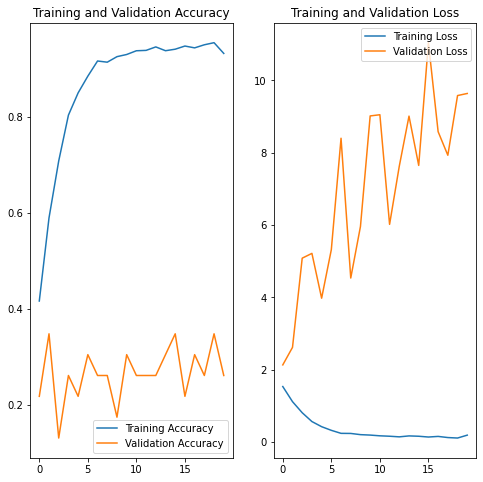

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
We can notice that the training accuracy is 93% whereas validation accuracy is 26%, which is very low as compared to training accuracy. The model is highly overfitting.

### Write your findings here

In [77]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomZoom(0.6),
  layers.RandomRotation(0.2)
])

num_classes = 9
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [78]:
# Compile
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
# Train
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
394/394 [==============================] - 18s 43ms/step - loss: 1.7128 - accuracy: 0.3436 - val_loss: 2.0728 - val_accuracy: 0.3043
Epoch 2/20
394/394 [==============================] - 16s 42ms/step - loss: 1.4753 - accuracy: 0.4230 - val_loss: 2.0399 - val_accuracy: 0.3913
Epoch 3/20
394/394 [==============================] - 17s 42ms/step - loss: 1.4004 - accuracy: 0.4578 - val_loss: 1.8257 - val_accuracy: 0.3043
Epoch 4/20
394/394 [==============================] - 16s 41ms/step - loss: 1.3368 - accuracy: 0.4776 - val_loss: 2.0626 - val_accuracy: 0.3478
Epoch 5/20
394/394 [==============================] - 16s 42ms/step - loss: 1.2945 - accuracy: 0.4987 - val_loss: 1.8175 - val_accuracy: 0.3913
Epoch 6/20
394/394 [==============================] - 16s 42ms/step - loss: 1.2439 - accuracy: 0.5141 - val_loss: 1.8239 - val_accuracy: 0.3478
Epoch 7/20
394/394 [==============================] - 16s 41ms/step - loss: 1.1926 - accuracy: 0.5315 - val_loss: 1.8707 - val_accuracy:

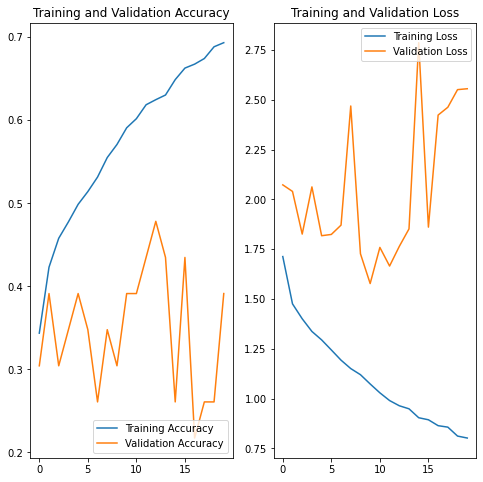

In [80]:
#Visualizing results after applying image augmentation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### OBSERVATION POST USING IMAGE AUGMENTATION: Training accuracy is 69% and testing accuracy is 39%. The gap between train and test accuracies has reduced. That means the overfitting has reduced.

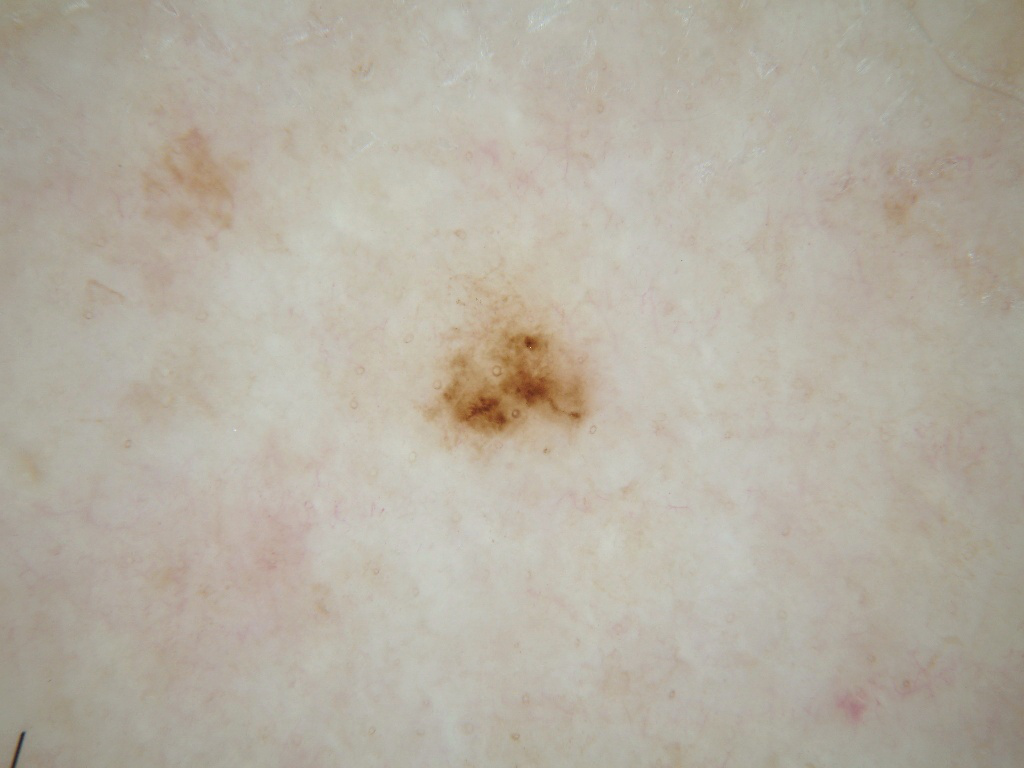

In [81]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
#Load an image using Keras image class
image_file = '/content/gdrive/MyDrive/Melanoma/Train/melanoma/ISIC_0009971.jpg'
m_image = tf.keras.preprocessing.image.load_img(image_file)
m_array = tf.keras.preprocessing.image.img_to_array(m_image)

#Inspect image
m_image

In [82]:
# Build a function to display Original and Transformed images
def plot_images(original_image, updated_image):
    
    plt.figure(figsize=(15,8))
    #Original image
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original_image)

    #Transformed image
    plt.subplot(1,2,2)
    plt.title('Transformed image')
    plt.imshow(updated_image)

    plt.show()

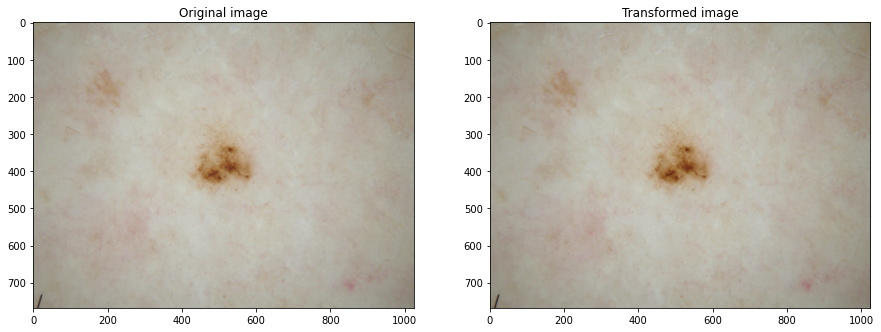

In [83]:
# Flipping image
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
transformed_array = transform_fn.random_transform(m_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)
plot_images(m_image, transformed_image)

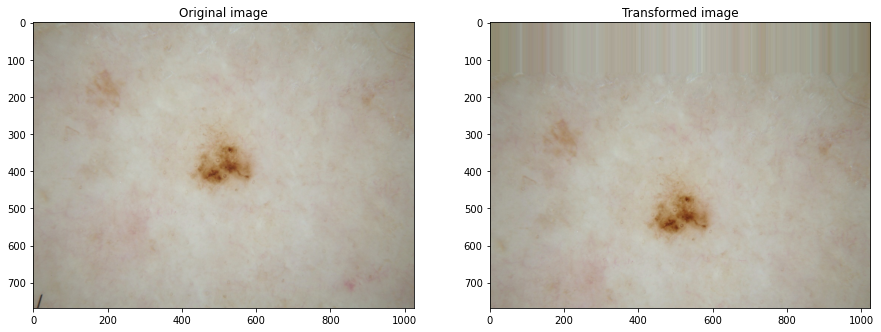

In [84]:
# Shifting image
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=200)
transformed_array = transform_fn.random_transform(m_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(m_image, transformed_image)

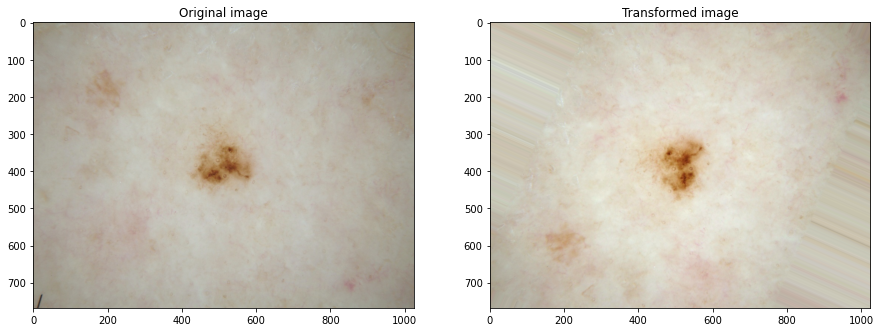

In [85]:
# Rotating image
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=100)
transformed_array = transform_fn.random_transform(m_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(m_image, transformed_image)

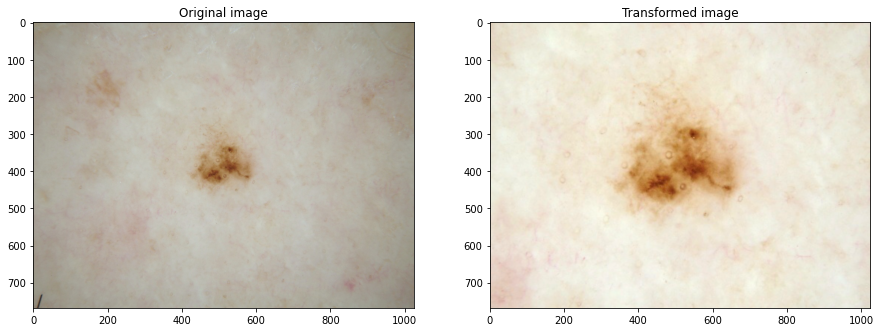

In [86]:
# Zooming image
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5, 0.5])
transformed_array = transform_fn.random_transform(m_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(m_image, transformed_image)

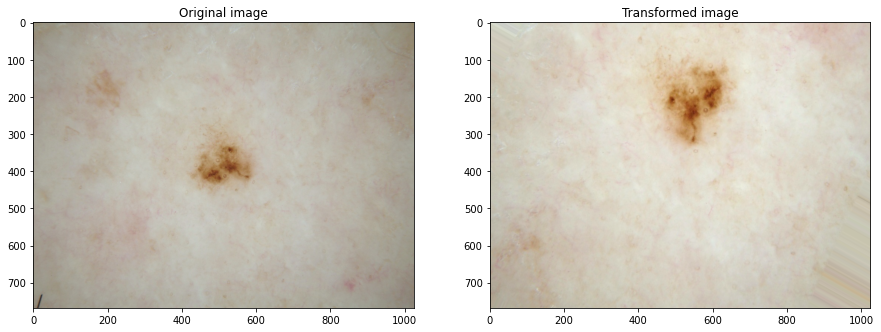

In [87]:
# Applying multiple transformations
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.3,
                                                               height_shift_range=0.5,
                                                               rotation_range=90,
                                                               shear_range=0.2,
                                                               zoom_range=0.6)
transformed_array = transform_fn.random_transform(m_array)
transformed_image = tf.keras.preprocessing.image.array_to_img(transformed_array)

plot_images(m_image, transformed_image)

In [88]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])



### Compiling the model

In [89]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [90]:
## Your code goes here, note: train your model for 20 epochs 
epochs = 20
history = model.fit(      ## your training code
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
394/394 [==============================] - 15s 37ms/step - loss: 1.5641 - accuracy: 0.4043 - val_loss: 2.1646 - val_accuracy: 0.2174
Epoch 2/20
394/394 [==============================] - 14s 36ms/step - loss: 1.1389 - accuracy: 0.5762 - val_loss: 2.4875 - val_accuracy: 0.3043
Epoch 3/20
394/394 [==============================] - 14s 36ms/step - loss: 0.8790 - accuracy: 0.6761 - val_loss: 3.5607 - val_accuracy: 0.2609
Epoch 4/20
394/394 [==============================] - 14s 36ms/step - loss: 0.6301 - accuracy: 0.7752 - val_loss: 4.4389 - val_accuracy: 0.2174
Epoch 5/20
394/394 [==============================] - 14s 36ms/step - loss: 0.4712 - accuracy: 0.8304 - val_loss: 4.6507 - val_accuracy: 0.2174
Epoch 6/20
394/394 [==============================] - 14s 36ms/step - loss: 0.3887 - accuracy: 0.8598 - val_loss: 5.0809 - val_accuracy: 0.2174
Epoch 7/20
394/394 [==============================] - 14s 36ms/step - loss: 0.3223 - accuracy: 0.8855 - val_loss: 5.2124 - val_accuracy:

### Visualizing the results

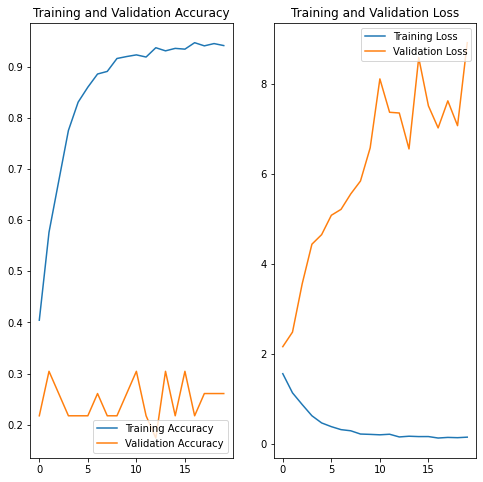

In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## OBSERVATIONS POST USING DROPOUT: The gap between train and test accuracies is still a lot. That means the overfitting has not got much affected by using dropout.

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
Dropout is not helping here. It has made the model more overfitted. We an try image augmention to introduce more images to the dataset to solve for overfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.



In [92]:
# We saw above 9 classes are ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

#Count records in each class
DIR = '/content/gdrive/MyDrive/Melanoma/Train/actinic keratosis'
print ('actinic keratosis class record count is:' , len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '/content/gdrive/MyDrive/Melanoma/Train/basal cell carcinoma'
print ('basal cell carcinoma class record count is:' , len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '/content/gdrive/MyDrive/Melanoma/Train/dermatofibroma'
print ('dermatofibroma class record count is:' , len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '/content/gdrive/MyDrive/Melanoma/Train/melanoma'
print ('melanoma class record count is:' , len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '/content/gdrive/MyDrive/Melanoma/Train/nevus'
print ('nevus class record count is:' , len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '/content/gdrive/MyDrive/Melanoma/Train/pigmented benign keratosis'
print ('pigmented benign keratosis class record count is:' , len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '/content/gdrive/MyDrive/Melanoma/Train/seborrheic keratosis'
print ('seborrheic keratosis class record count is:' , len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '/content/gdrive/MyDrive/Melanoma/Train/squamous cell carcinoma'
print ('squamous cell carcinoma class record count is:' , len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '/content/gdrive/MyDrive/Melanoma/Train/vascular lesion'
print ('vascular lesion class record count is:' , len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))


actinic keratosis class record count is: 114
basal cell carcinoma class record count is: 376
dermatofibroma class record count is: 95
melanoma class record count is: 438
nevus class record count is: 357
pigmented benign keratosis class record count is: 462
seborrheic keratosis class record count is: 77
squamous cell carcinoma class record count is: 181
vascular lesion class record count is: 139


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis and melanoma dominate the data in terms proportionate number of samples i.e. have the highest samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [46]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [18]:
path_to_training_dataset='/content/gdrive/MyDrive/Melanoma/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F8A8F0D50>: 100%|██████████| 500/500 [00:23<00:00, 21.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F893F2750>: 100%|██████████| 500/500 [00:23<00:00, 21.67 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F8A31F190>: 100%|██████████| 500/500 [00:23<00:00, 20.93 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F0F89393A90>: 100%|██████████| 500/500 [01:56<00:00,  4.28 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F0F8933BC90>: 100%|██████████| 500/500 [01:39<00:00,  5.01 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F893DAD90>: 100%|██████████| 500/500 [00:22<00:00, 21.76 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0F89433190>: 100%|██████████| 500/500 [00:50<00:00,  9.96 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F893C7310>: 100%|██████████| 500/500 [00:23<00:00, 21.39 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F8A2EFE10>: 100%|██████████| 500/500 [00:23<00:00, 21.68 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [41]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


In [43]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [44]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,gdrive/MyDrive/Melanoma/Train/pigmented benign...,pigmented benign keratosis
1,gdrive/MyDrive/Melanoma/Train/pigmented benign...,pigmented benign keratosis
2,gdrive/MyDrive/Melanoma/Train/pigmented benign...,pigmented benign keratosis
3,gdrive/MyDrive/Melanoma/Train/pigmented benign...,pigmented benign keratosis
4,gdrive/MyDrive/Melanoma/Train/pigmented benign...,pigmented benign keratosis
...,...,...
2234,gdrive/MyDrive/Melanoma/Train/nevus/ISIC_00290...,nevus
2235,gdrive/MyDrive/Melanoma/Train/nevus/ISIC_00288...,nevus
2236,gdrive/MyDrive/Melanoma/Train/nevus/ISIC_00289...,nevus
2237,gdrive/MyDrive/Melanoma/Train/nevus/ISIC_00294...,nevus


### Lets see the distribution of augmented data after adding new images to the original training data.

Class=5, n=462 (20.634%)
Class=2, n=95 (4.243%)
Class=7, n=181 (8.084%)
Class=6, n=77 (3.439%)
Class=1, n=376 (16.793%)
Class=3, n=438 (19.562%)
Class=8, n=139 (6.208%)
Class=0, n=114 (5.092%)
Class=4, n=357 (15.945%)


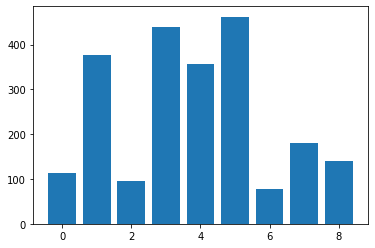

In [45]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Through distribution also, we see same results.  
#### - Which class has the least number of samples?
seborrheic keratosis has the least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis and melanoma dominate the data in terms proportionate number of samples i.e. have the highest samples



In [47]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['gdrive/MyDrive/Melanoma/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026139.jpg_f896f6fd-1a65-4ede-b3e7-24c221ccf8d9.jpg',
 'gdrive/MyDrive/Melanoma/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028389.jpg_55bded2d-6cc4-42da-b31a-3bca924bb1a3.jpg',
 'gdrive/MyDrive/Melanoma/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026263.jpg_d08a1f26-3ced-4082-aa21-86821c0b0c6c.jpg',
 'gdrive/MyDrive/Melanoma/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026511.jpg_1543b40d-6fe1-4473-8fcd-fc1f3406ca98.jpg',
 'gdrive/MyDrive/Melanoma/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027989.jpg_af97abe8-ac64-4ba1-b4d7-18b27b2eeeec.jpg',
 'gdrive/MyDrive/Melanoma/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027850.jpg_d6569bbc-cf53-4618-b530-a5a60587cab3.jpg',
 'gdrive/MyDrive/Melanoma/Tr

In [48]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [49]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [50]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [51]:
new_df['Label'].value_counts()

pigmented benign keratosis    1962
melanoma                      1938
basal cell carcinoma          1876
nevus                         1857
squamous cell carcinoma       1681
vascular lesion               1639
actinic keratosis             1614
dermatofibroma                1595
seborrheic keratosis          1577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [52]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [53]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


#### **Todo:** Create a validation dataset

In [54]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [56]:
## your code goes here
### Your code goes here
num_classes = 9

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.BatchNormalization(input_shape=(180,180,3,)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [57]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [59]:
# Using 30 epochs as asked in the problem statement
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
394/394 [==============================] - 738s 383ms/step - loss: 1.4308 - accuracy: 0.4828 - val_loss: 1.0190 - val_accuracy: 0.6520
Epoch 2/30
394/394 [==============================] - 19s 49ms/step - loss: 0.7228 - accuracy: 0.7505 - val_loss: 0.5014 - val_accuracy: 0.8341
Epoch 3/30
394/394 [==============================] - 19s 48ms/step - loss: 0.3731 - accuracy: 0.8657 - val_loss: 0.3647 - val_accuracy: 0.8707
Epoch 4/30
394/394 [==============================] - 19s 48ms/step - loss: 0.2367 - accuracy: 0.9153 - val_loss: 0.3370 - val_accuracy: 0.8967
Epoch 5/30
394/394 [==============================] - 19s 48ms/step - loss: 0.1900 - accuracy: 0.9298 - val_loss: 0.2797 - val_accuracy: 0.9012
Epoch 6/30
394/394 [==============================] - 19s 48ms/step - loss: 0.1630 - accuracy: 0.9382 - val_loss: 0.3194 - val_accuracy: 0.8923
Epoch 7/30
394/394 [==============================] - 19s 48ms/step - loss: 0.1342 - accuracy: 0.9486 - val_loss: 0.2911 - val_accurac

#### **Todo:**  Visualize the model results

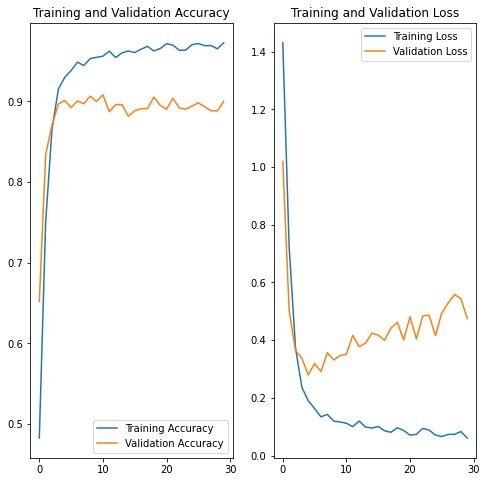

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### We are getting 97% accuracy in training dataset and 90% in test set. We can see that handling imbalanced data has made the model fit a lot better and helped remove overfitting. 